In [102]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the ocurrence of optimal tree among estimated champion trees

In [103]:
results_folder = os.path.abspath('../../examples/example2/results')
methods = ['SeqROCTM', 'prune', 'smc']
models = ['model1', 'model2']
sizes = [5000, 10000, 20000]
correct_model = '000 1 10 100'

def get_results(method, model_name, size):
    file = '%s/%s/%s_%s.csv' % (results_folder, method, model_name, size)
    return pd.read_csv(file)    

def compare_optimal_tree_occurrence(model_name):
    df = pd.DataFrame(columns= ['model', 'sample_size'] + methods)
    for size in sizes:
        arr = [(get_results(method, model_name, size).tree==correct_model).astype(int).sum() for method in methods]
        df.loc[len(df)] = ([model_name, size] + arr)
    return df.sort_values(['model', 'sample_size'])

def plot_model(model):
    plt.figure(figsize=(10,6))
    for m in methods:
        plt.plot(model.sample_size, model[m], label=m)
    plt.legend()
    plt.show()

### Model 1

In [104]:
model1 = compare_optimal_tree_occurrence('model1')
model1

,model,sample_size,SeqROCTM,prune,smc
0,model1,5000,28,81,54
1,model1,10000,49,85,47
2,model1,20000,82,96,51


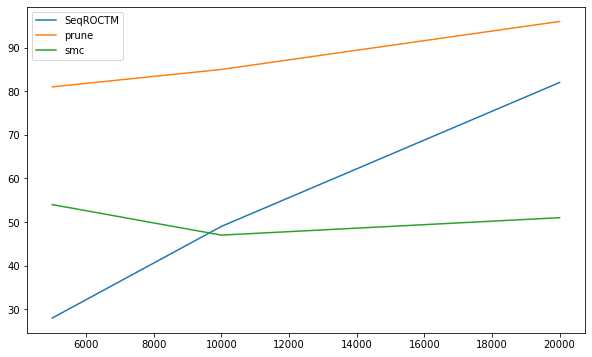

In [105]:
plot_model(model1)

### Model 2

In [106]:
model2 = compare_optimal_tree_occurrence('model2')
model2

,model,sample_size,SeqROCTM,prune,smc
0,model2,5000,67,89,53
1,model2,10000,87,94,42
2,model2,20000,99,100,58


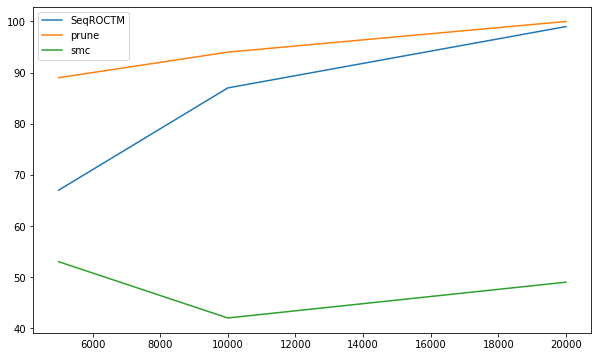

In [101]:
plot_model(model2)